Applying a decision tree to predict track popularity

In [55]:
from pandas import Series, DataFrame
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold #for cross validation
from sklearn.model_selection import train_test_split #to split data into test/train 
from patsy import dmatrices #to split data into matrices for model 
from sklearn import metrics #to compute accuracy score 
from sklearn import tree #to fit a decision tree
import warnings
warnings.filterwarnings('ignore') #to ignore warnings
import graphviz #for visualizing the tree
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('No_Outliers_Spotify.csv') #importing data set

In [3]:
#setting up the data into matrix form 
Y, X = dmatrices('target ~ 0 + instrumentalness + danceability + loudness + energy + acousticness + C(mode) + time_signature', df, return_type='dataframe')
y = Y['target'].values 
#splitting into test(30%) and train(70%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

The following function computes the accuracy of a decision tree for a given list of depths using cross validation to identify the optimal depth. It computes the ideal depth based on the highest accuracy score. It is important to remember that while we want an accurate model, we also want a model that we can interpret. 

In [19]:
def CV_Depth(num_folds,list_depths,Xtrain,ytrain):
    kfolds = StratifiedKFold(n_splits=num_folds, shuffle=True) #apply stratified K fold cross validation
    avg_scores = [] #make list filled with avg scores
    for value in list_depths:
        model_ = tree.DecisionTreeClassifier(criterion='entropy', max_depth=value)
        scores = cross_val_score(model_, Xtrain, ytrain, cv=kfolds)
        print('max depth={} avg score={}'.format(value, scores.mean()))
        avg_scores.append(scores.mean())
    plot(list_depths, avg_scores)
    xlabel('Max Depth Value')
    ylabel('Avg Accuracy of Classifier')
    indexbestdepth = avg_scores.index(max(avg_scores)) #accuracy is based on max average score 
    print("Best Depth: ", list_depths[indexbestdepth])

max depth=1 avg score=0.747407800164958
max depth=1 avg score=0.7490625368210203
max depth=2 avg score=0.7639573759868034
max depth=3 avg score=0.783227288794627
max depth=4 avg score=0.7921747967479675
max depth=5 avg score=0.793552639330741
max depth=6 avg score=0.7840432426063392
max depth=7 avg score=0.7834938729822081
max depth=8 avg score=0.7859446800989749
max depth=9 avg score=0.787847590432426
max depth=10 avg score=0.7878468540120184
max depth=11 avg score=0.7775377047248734
max depth=12 avg score=0.7732016613644397
max depth=13 avg score=0.7775399139860963
max depth=14 avg score=0.7767283786968304
max depth=15 avg score=0.7531076941204196
max depth=16 avg score=0.7756392129138682
max depth=17 avg score=0.7558228761635443
max depth=18 avg score=0.7552845528455284
max depth=19 avg score=0.7580012077294687
max depth=20 avg score=0.7571881995993872
Best Depth:  5


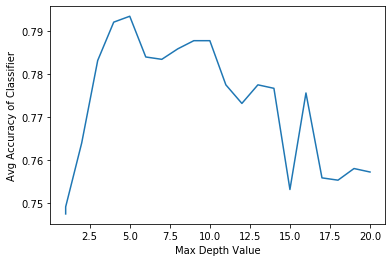

In [20]:
depths = [1] + [(x + 1) for x in range(20)] #list of depths ranging from 1-20
#applying function using 10 fold cross validation
CV_Depth(10,depths,X_train,y_train)


The greatest accuracy for our training data is achieved with a max depth of 5

The following function then fits a decision tree using our optimal depth and computes test and training accuracy. 

In [56]:
def accuracy_tester(max_depth,formula,df_name,y_var):
    Y, X = dmatrices(formula, df_name, return_type='dataframe')
    y = Y[y_var].values 
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)
    model_ = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    result_ = model_.fit(Xtrain, ytrain)
    prediction_train_ = model_.predict(Xtrain) #y train hat values 
    print("Train Set Accuracy: ",metrics.accuracy_score(ytrain, prediction_train_)) #prediction accuracy on train set
    prediction_ = model_.predict(Xtest) #y test hat values 
    print("Test Set Accuracy: ", metrics.accuracy_score(ytest, prediction_)) #prediction accuracy on test set
    #creating a graphic of the tree
    tree1 = graphviz.Source(tree.export_graphviz(model_,out_file=None,feature_names=X.columns.values,filled=True))
    return tree1

Train Set Accuracy:  0.8155181768855128
Test Set Accuracy:  0.8088607594936709


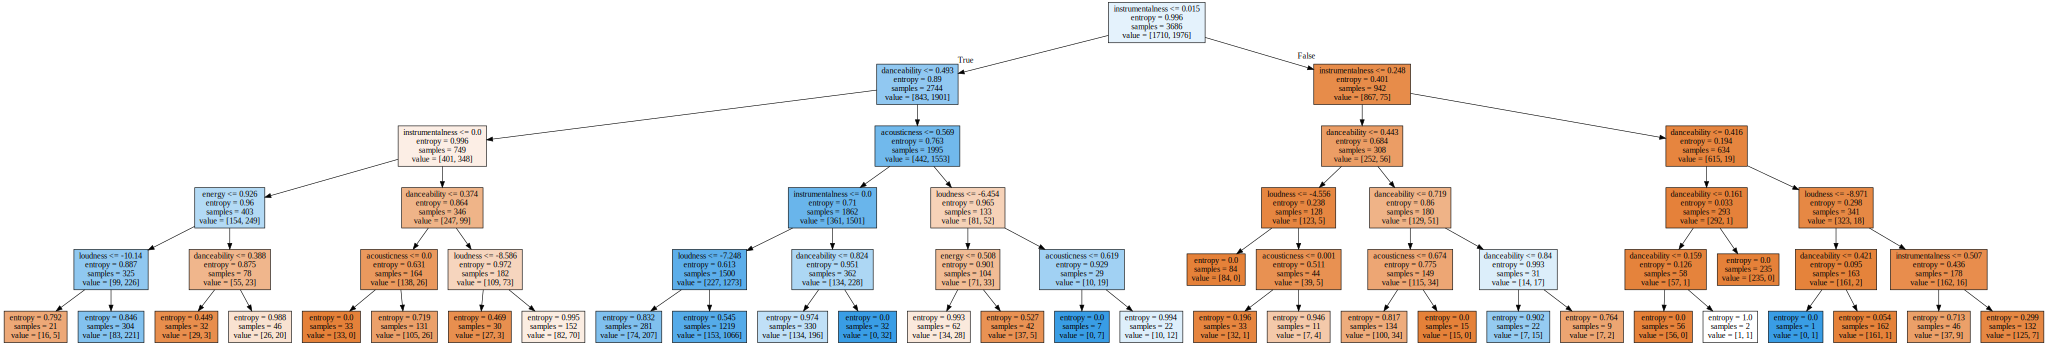

In [57]:
equation = 'target ~ 0 + instrumentalness + danceability + loudness + energy + acousticness + C(mode) + time_signature'
accuracy_tester(5,equation,df,'target')

Our decision tree achieves 81% train accuracy and 80% test accuracy. 

The tree indicates that a song's instrumentalness and danceability have the greatest influence over the song's popularity. 